<a href="https://colab.research.google.com/github/Sahil-Singh2002/Modelling-with-Differential-Equations/blob/main/Vector_Field.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The equilibrium points are: [(-2.00000000000000, -1.00000000000000), (0.0, 0.0)]


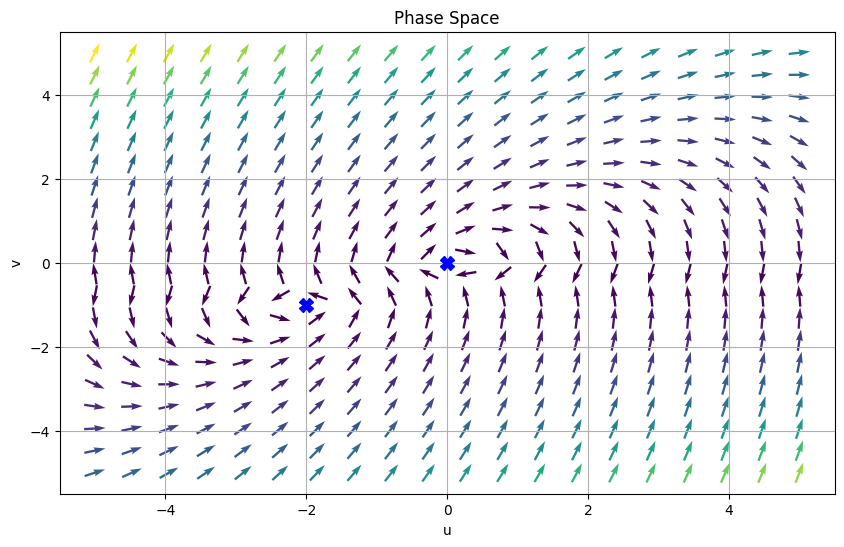

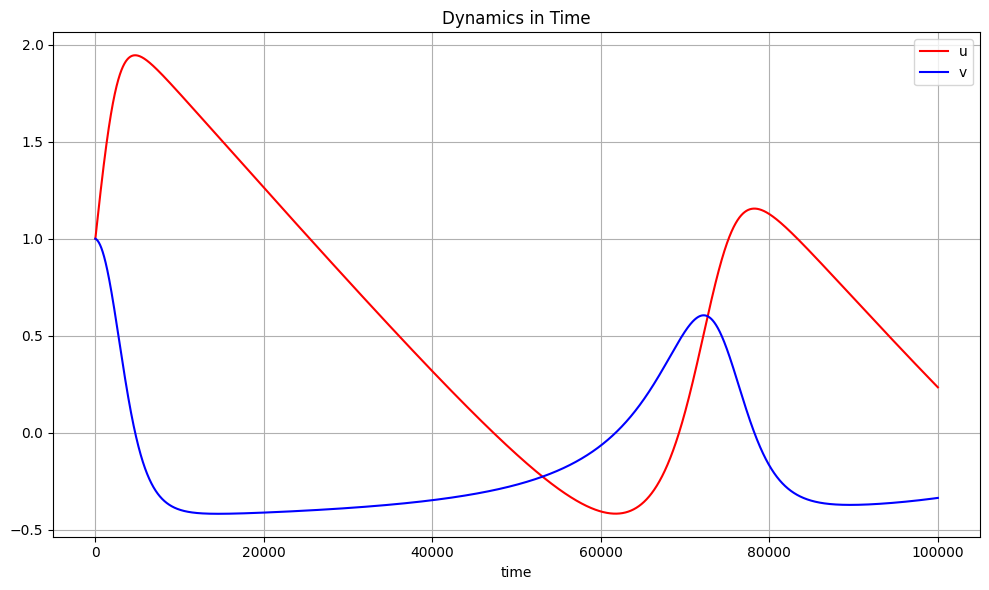

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import sympy as sm

def system(u, v):
    du_dt = v + v**2
    dv_dt = -0.5 * u + 0.2 * v - u * v + 1.2 * v**2
    return du_dt, dv_dt

# Phase portrait
u_range = np.linspace(-5, 5, 20)
v_range = np.linspace(-5, 5, 20)
U, V = np.meshgrid(u_range, v_range)

du_dt, dv_dt = system(U, V)
M = np.hypot(du_dt, dv_dt)
M[M == 0] = 1
du_dt /= M
dv_dt /= M

fig, ax = plt.subplots(figsize=(10, 6))
ax.quiver(U, V, du_dt, dv_dt, M, pivot='mid')
ax.set_xlabel("u")
ax.set_ylabel("v")
ax.set_title("Phase Space")
ax.grid()

# Equilibrium points
u, v = sm.symbols('u, v', real=True)
du_dt, dv_dt = system(u, v)

equilibria = sm.solve((sm.Eq(du_dt, 0), sm.Eq(dv_dt, 0)), u, v)
print(f'The equilibrium points are: {equilibria}')

for point in equilibria:
    ax.plot(point[0], point[1], "blue", marker="X", markersize=10.0)

# Dynamics in time
t = np.linspace(0, 20, 10**5)
def Sys(X, t=0):
    return np.array([X[1] + X[1]**2, -0.5 * X[0] + 0.2 * X[1] - X[0] * X[1] + 1.2 * X[1]**2])

Sys0 = np.array([1, 1])
X = odeint(Sys, Sys0, t)
u, v = X.T

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(u, 'r-', label='u')
ax.plot(v, 'b-', label='v')
ax.set_title("Dynamics in Time")
ax.set_xlabel("time")
ax.grid()
ax.legend(loc='best')

plt.tight_layout()
plt.show()



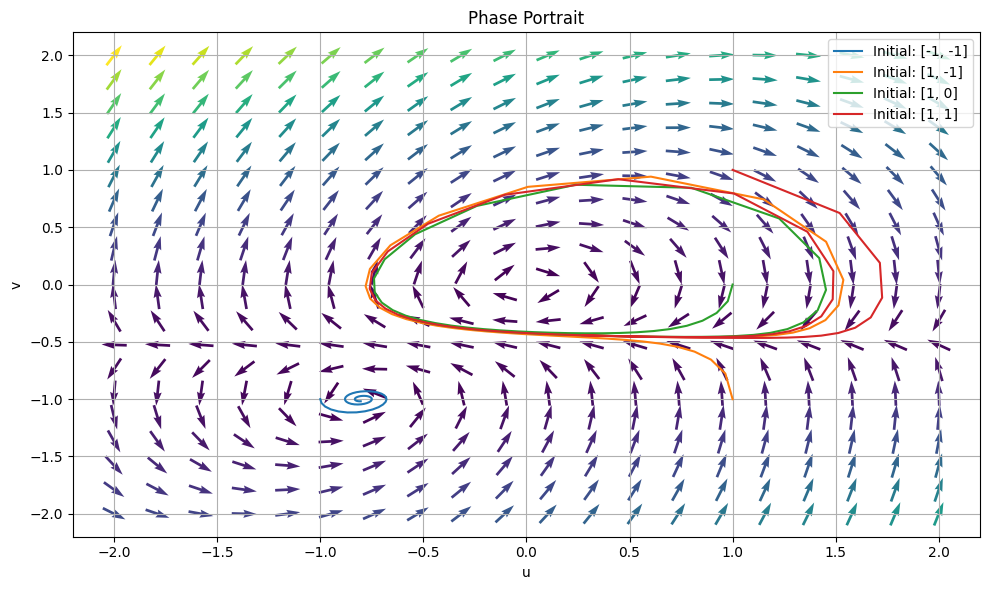

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the system of ODEs
def system(uv, t):
    u, v = uv
    du_dt = v + v**2
    dv_dt = -0.5 * u + 0.2 * v - u * v + 0.6 * v**2
    return [du_dt, dv_dt]

# Phase portrait
u_range = np.linspace(-2, 2, 20)
v_range = np.linspace(-2, 2, 20)
U, V = np.meshgrid(u_range, v_range)

du_dt, dv_dt = system([U, V], t=0)
M = np.hypot(du_dt, dv_dt)
M[M == 0] = 1
du_dt /= M
dv_dt /= M

fig, ax = plt.subplots(figsize=(10, 6))
ax.quiver(U, V, du_dt, dv_dt, M, pivot='mid')
ax.set_xlabel("u")
ax.set_ylabel("v")
ax.set_title("Phase Portrait")
ax.grid()


# Solution curves
t = np.linspace(0, 20, 10*6)
initial_conditions = [[-1, -1], [1, -1], [1, 0], [1, 1]]

for ic in initial_conditions:
    sol = odeint(system, ic, t)
    ax.plot(sol[:, 0], sol[:, 1], label=f'Initial: {ic}')

ax.legend()
plt.tight_layout()
plt.show()

